In [1]:
!pip install gensim
!pip install sklearn
!pip install spacy
!python -m spacy download en_core_web_sm


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import spacy


In [3]:
words = [['king'], ['queen'], ['man'], ['woman'], ['paris'], ['france'], ['london'], ['england']]


In [4]:
# Train the Word2Vec model
model = Word2Vec(sentences=words, vector_size=10, window=3, min_count=1, sg=0)

# Save the model for later use (optional)
model.save("word2vec.model")


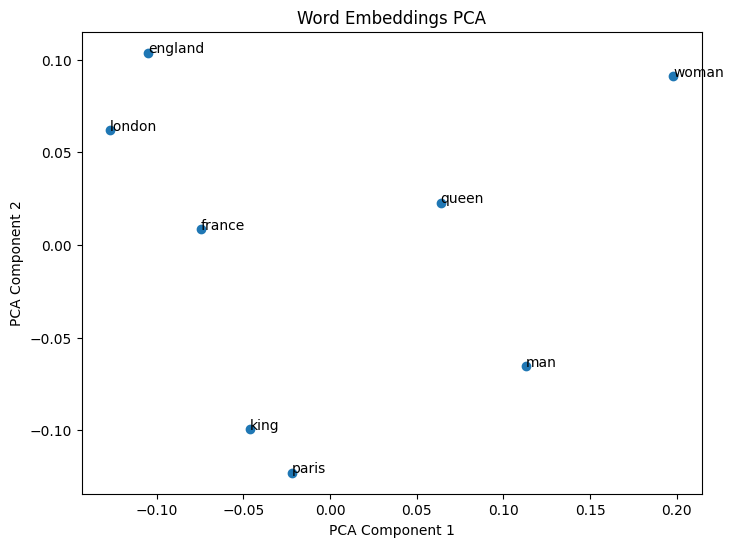

In [5]:
# Extract word vectors
word_vectors = model.wv[model.wv.key_to_index]

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
word_vectors_pca = pca.fit_transform(word_vectors)

# Plot the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(word_vectors_pca[:, 0], word_vectors_pca[:, 1])

# Annotate the points with the words
words_list = list(model.wv.key_to_index)
for i, word in enumerate(words_list):
    plt.annotate(word, xy=(word_vectors_pca[i, 0], word_vectors_pca[i, 1]))

plt.title('Word Embeddings PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [6]:
# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")


In [7]:
# Input text
text = "The quick brown fox jumps over the lazy dog"

# Process the text using spaCy
doc = nlp(text)

# Print the dependency parsing results
for token in doc:
    print(f"{token.text} ({token.dep_}): Head -> {token.head.text}")


The (det): Head -> fox
quick (amod): Head -> fox
brown (amod): Head -> fox
fox (nsubj): Head -> jumps
jumps (ROOT): Head -> jumps
over (prep): Head -> jumps
the (det): Head -> dog
lazy (amod): Head -> dog
dog (pobj): Head -> over
